In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt


## Работа с изображениями и их преобразование

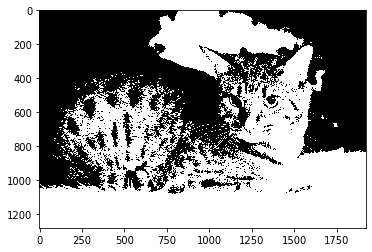

In [36]:
# Преобразование картинки и поиск границ
import cv2
image1 = cv2.imread('333.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)

_, binary = cv2.threshold(gray, 105, 255, cv2.THRESH_BINARY)
plt.imshow(binary, cmap='gray')
plt.show()

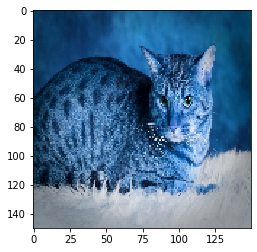

In [37]:
# Преобразование картинки в матрицу пикселей
import cv2
im1 = cv2.imread('333.jpg')

# уменьшаем изображение до подготовленных размеров
resized = cv2.resize(im1, (150, 150))

# Выводим картинку после преобразования
plt.imshow(resized)
plt.show()

In [40]:
from img2vec_pytorch import Img2Vec
from PIL import Image

# Инициализируем Img2Vec
img2vec = Img2Vec()

# Считываем картинку и переводим в RGB формат
img = Image.open('333.jpg').convert('RGB')
# Преобразуем картинку в вектор
vec = img2vec.get_vec(img)
vec

array([6.05342537e-02, 8.66047740e-01, 4.63101834e-01, 9.43724871e-01,
       5.65017983e-02, 7.71967590e-01, 5.50158918e-01, 1.11003423e+00,
       1.31258178e+00, 8.27780962e-02, 2.29889274e+00, 1.67014825e+00,
       1.50433397e+00, 4.88082677e-01, 6.36802971e-01, 1.62037998e-01,
       3.47434521e-01, 1.18046117e+00, 2.44759694e-01, 9.30653393e-01,
       1.30587363e+00, 2.13529968e+00, 3.56839933e-02, 1.17157853e+00,
       1.92946300e-01, 1.07793534e+00, 4.79786277e-01, 9.26065862e-01,
       1.32399350e-01, 9.70658064e-01, 7.84339607e-01, 5.94808161e-01,
       1.86093867e+00, 1.40039062e+00, 3.14679176e-01, 1.58452129e+00,
       8.40499043e-01, 8.27811658e-02, 2.82522738e-01, 8.43734920e-01,
       1.37774587e-01, 8.66617933e-02, 4.72478598e-01, 6.78290784e-01,
       7.17189074e-01, 2.69930094e-01, 4.79305387e-02, 2.82925320e+00,
       1.20422506e+00, 3.27514338e+00, 8.19520891e-01, 1.29278040e+00,
       3.79389405e-01, 2.09249422e-01, 1.15152097e+00, 6.28855586e-01,
      

## Построение сверточной нейронной сети

In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

In [5]:
path = 'C://Users/DeryabinNS/CNN'

In [6]:
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=True)

In [7]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

C:\Users\79517\.keras\datasets
C:\Users\79517\.keras\datasets/cats_and_dogs_filtered
C:\Users\79517\.keras\datasets/cats_and_dogs_filtered/train
C:\Users\79517\.keras\datasets/cats_and_dogs_filtered/train/cats
C:\Users\79517\.keras\datasets/cats_and_dogs_filtered/train/dogs
C:\Users\79517\.keras\datasets/cats_and_dogs_filtered/validation
C:\Users\79517\.keras\datasets/cats_and_dogs_filtered/validation/cats
C:\Users\79517\.keras\datasets/cats_and_dogs_filtered/validation/dogs


In [8]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'cats')

In [9]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [10]:
print(num_cats_tr, num_dogs_tr, num_cats_val, num_dogs_val, total_train, total_val)

1000 1000 500 500 2000 1000


In [11]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [12]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [13]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE, IMG_SHAPE),
                                                          class_mode='binary')

Found 2000 images belonging to 2 classes.


In [14]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=validation_dir,
                                                          shuffle=False,
                                                          target_size=(IMG_SHAPE, IMG_SHAPE),
                                                          class_mode='binary')

Found 1000 images belonging to 2 classes.


In [15]:
sample_training_images, _ = next(train_data_gen)

In [16]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

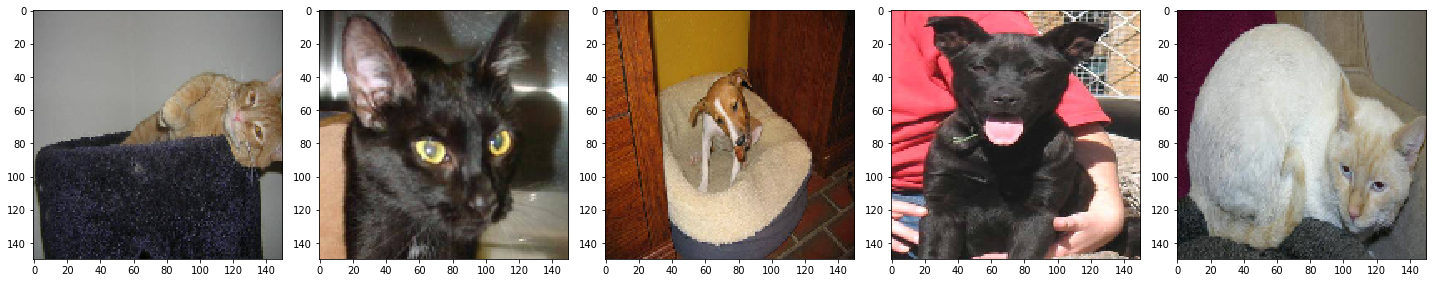

In [17]:
plotImages(sample_training_images[:5])

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [19]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics='accuracy')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [21]:
EPOCHS = 15
history = model.fit_generator(train_data_gen, steps_per_epoch=int(total_train / float(BATCH_SIZE)),
                             epochs=EPOCHS, validation_data=val_data_gen,
                             validation_steps=int(total_val / float(BATCH_SIZE)))

C:\Users\79517\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
20/20 [==============================] - 271s 13s/step - loss: 1.2230 - accuracy: 0.5070 - val_loss: 0.6849 - val_accuracy: 0.5360
Epoch 2/15
20/20 [==============================] - 467s 23s/step - loss: 0.6848 - accuracy: 0.5475 - val_loss: 0.6691 - val_accuracy: 0.6420
Epoch 3/15
20/20 [==============================] - 318s 16s/step - loss: 0.6504 - accuracy: 0.6195 - val_loss: 0.6373 - val_accuracy: 0.6390
Epoch 4/15
20/20 [==============================] - 398s 19s/step - loss: 0.6007 - accuracy: 0.6855 - val_loss: 0.6575 - val_accuracy: 0.6150
Epoch 5/15
20/20 [==============================] - 459s 23s/step - loss: 0.5439 - accuracy: 0.7390 - val_loss: 0.5815 - val_accuracy: 0.7110
Epoch 6/15
20/20 [==============================] - 337s 16s/step - loss: 0.5222 - accuracy: 0.7470 - val_loss: 0.5696 - val_accuracy: 0.7120
Epoch 7/15
20/20 [==============================] - 402s 19s/step - loss: 0.4499 - accuracy: 0.7935 - val_loss: 0.6208 - val_accuracy: 0.6930
Epoch 

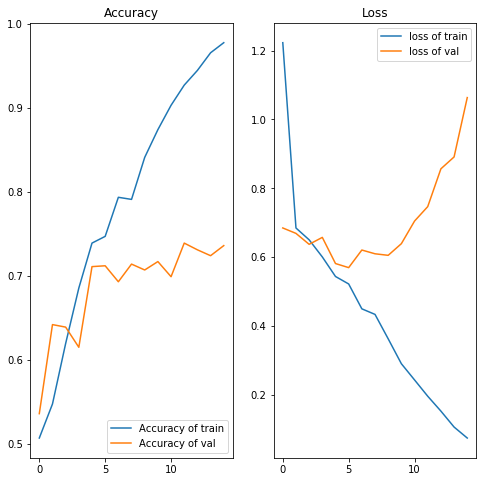

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))  
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Accuracy of train')
plt.plot(epochs_range, val_acc, label='Accuracy of val')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='loss of train')
plt.plot(epochs_range, val_loss, label='loss of val')
plt.legend(loc='upper right')
plt.title('Loss')
plt.savefig('./foo.png')
plt.show()